## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

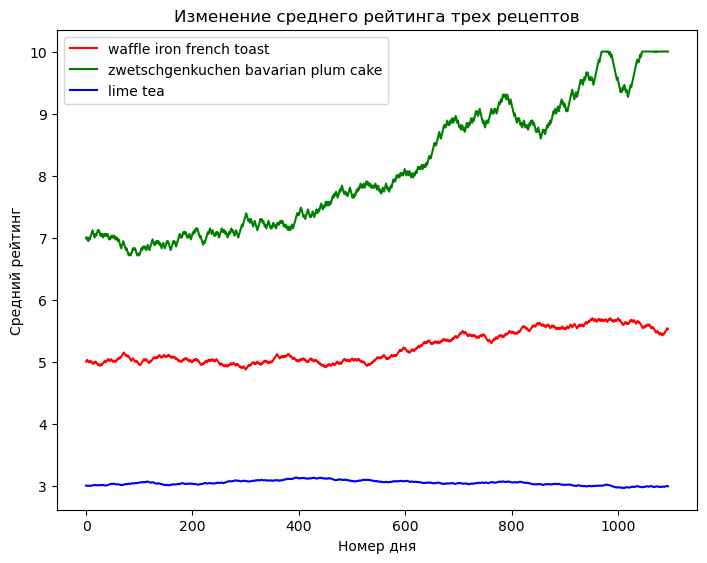

In [2]:
data = np.load('average_ratings.npy')
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 1, 1])
ax.plot(data[0], 'r', label = 'waffle iron french toast')
ax.plot(data[1], 'g', label = 'zwetschgenkuchen bavarian plum cake')
ax.plot(data[2], 'b', label = 'lime tea')
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.legend(loc = 'upper left')
ax.set_title('Изменение среднего рейтинга трех рецептов');

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


Text(0.5, 1.0, 'Изменение среднего рейтинга трех рецептов')

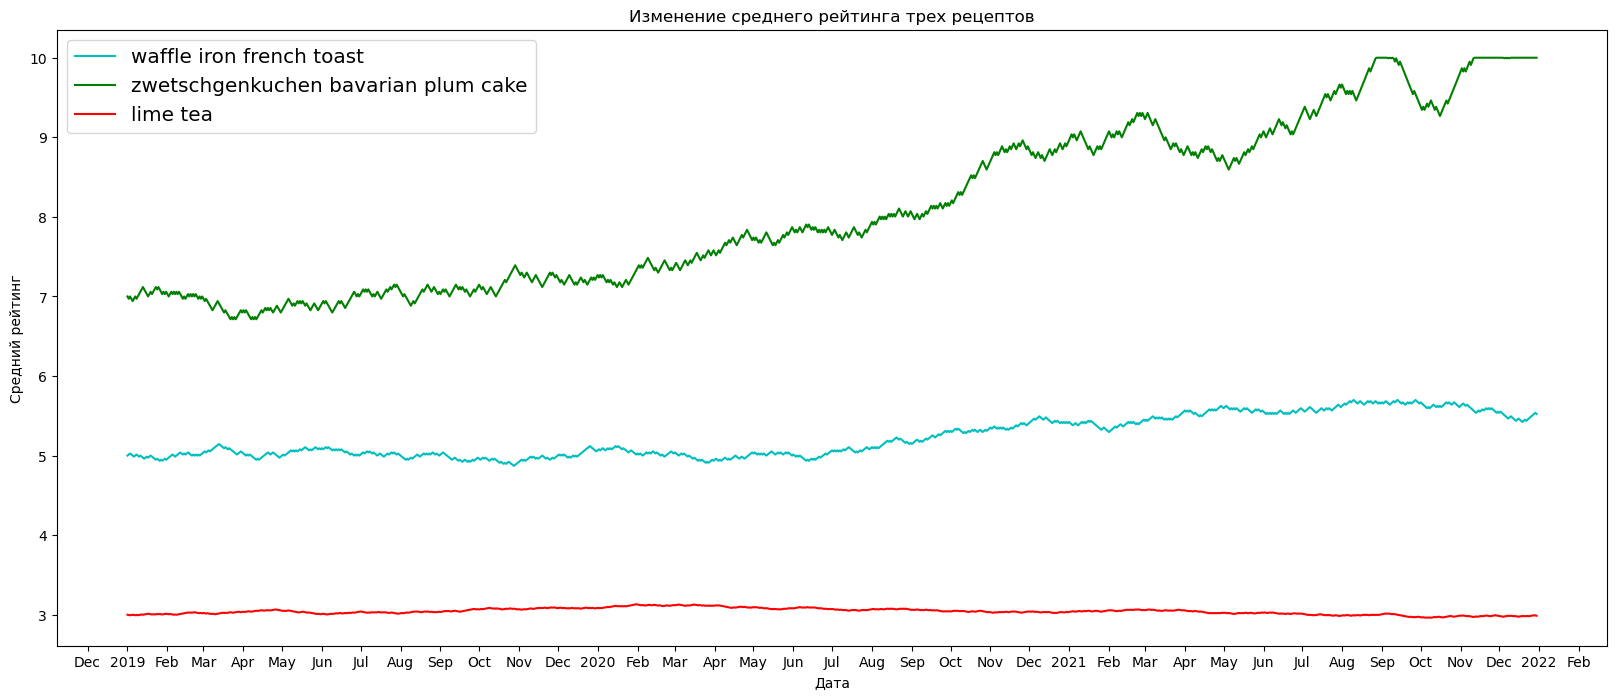

In [5]:
dates = pd.date_range(start='2019-01-01', end='2021-12-30')
av_rat = np.load('average_ratings.npy')
fig, ax = plt.subplots(figsize = (20, 8))

ax.plot(dates, av_rat[0], color = 'c')
ax.plot(dates, av_rat[1], color = 'g')
ax.plot(dates, av_rat[2], color = 'r')

ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=()))
ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))

ax.legend(['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'], fontsize = 'x-large')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.title('Изменение среднего рейтинга трех рецептов')

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0.5, 0, 'Номер дня')

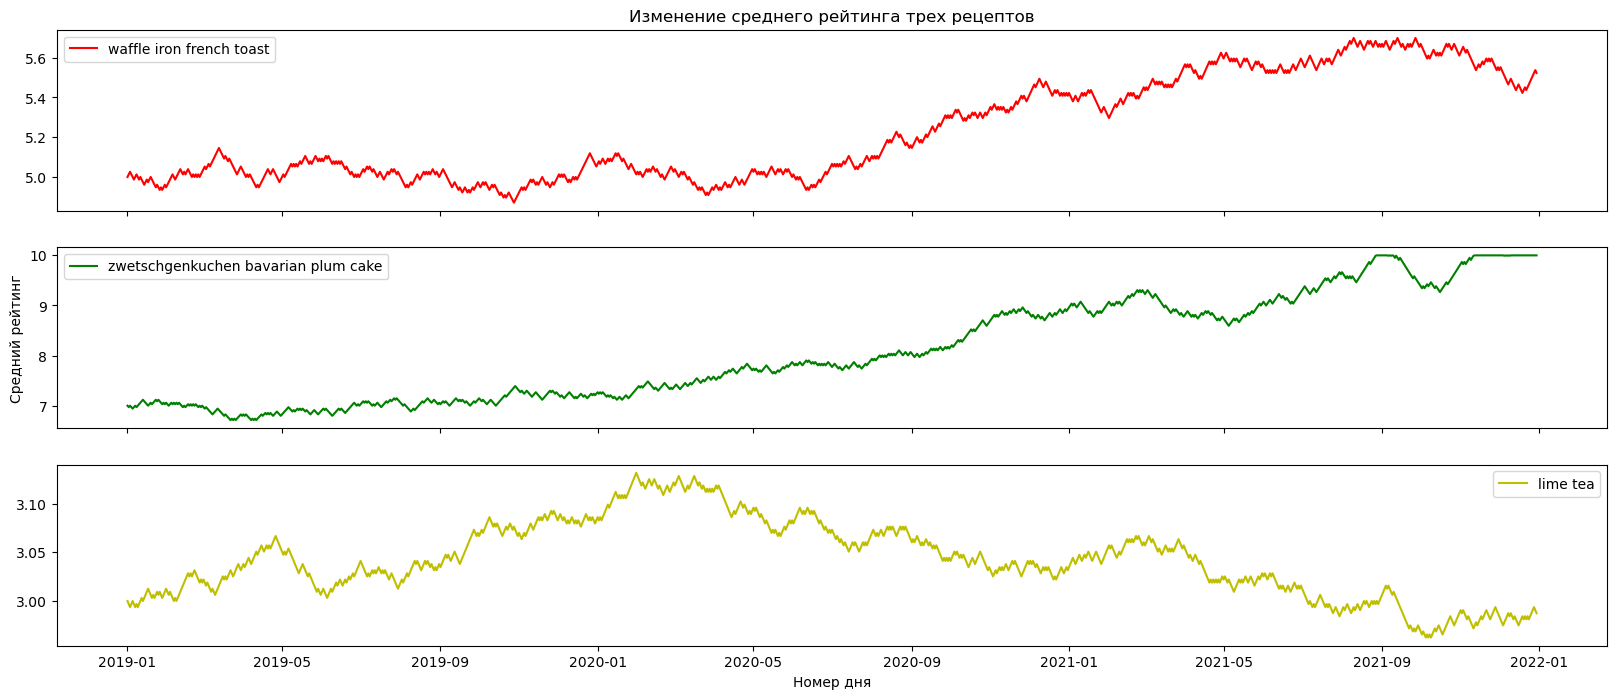

In [6]:
fig, ax = plt.subplots(3, 1, figsize = (20, 8))

ax[0].plot(dates, data[0], color = 'r')
ax[1].plot(dates, data[1], color = 'g')
ax[2].plot(dates, data[2], color = 'y')

ax[0].xaxis.set_tick_params(which='both', bottom=True, labelbottom=False, labeltop=False)
ax[1].xaxis.set_tick_params(which='both', bottom=True, labelbottom=False, labeltop=False)
ax[2].xaxis.set_tick_params(which='both', bottom=True)

ax[0].legend(['waffle iron french toast'])
ax[1].legend(['zwetschgenkuchen bavarian plum cake'])
ax[2].legend(['lime tea'])
ax[0].set_title('Изменение среднего рейтинга трех рецептов')
ax[1].set_ylabel('Средний рейтинг')
ax[2].set_xlabel('Номер дня')

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


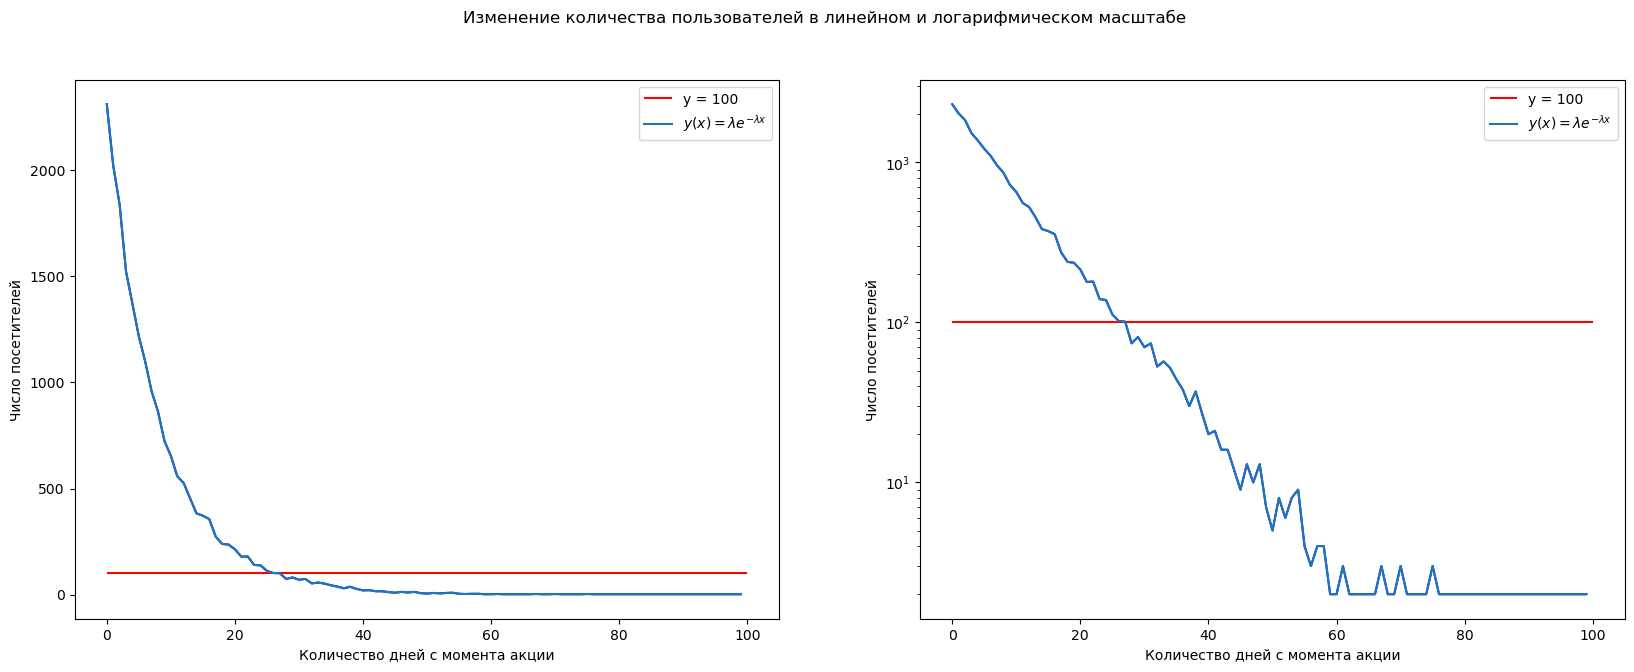

In [7]:
data2 = np.load('visitors.npy')
fig, ax = plt.subplots(1, 2, figsize = (20, 7))
ax[0].plot(data2, 'b')
ax[1].plot(data2, 'b')
ax[1].set_yscale('log')
for axi in ax:
    axi.hlines(100, 0, 100, 'r', label = 'y = 100')
    axi.plot(data2, label = '$y(x)=\lambda e^{-\lambda x}$')
    axi.set_xlabel('Количество дней с момента акции')
    axi.set_ylabel('Число посетителей')
    axi.legend(loc = 'upper right')
fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе');

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [8]:
reviews = pd.read_csv('reviews_sample.csv', index_col=0)
recipes = pd.read_csv('recipes_sample.csv', parse_dates=['submitted'])
recipes

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN
...,...,...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16.0,this is based on a french recipe but i changed...,10.0
29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,NaN,"this is a traditional fresh plum cake, thought...",11.0
29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,NaN,this is a traditional late summer early fall s...,NaN
29998,zydeco soup,486161,60,227978,2012-08-29,NaN,this is a delicious soup that i originally fou...,NaN


In [9]:
reviews

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0, 0.5, 'Размер групп рецептов')

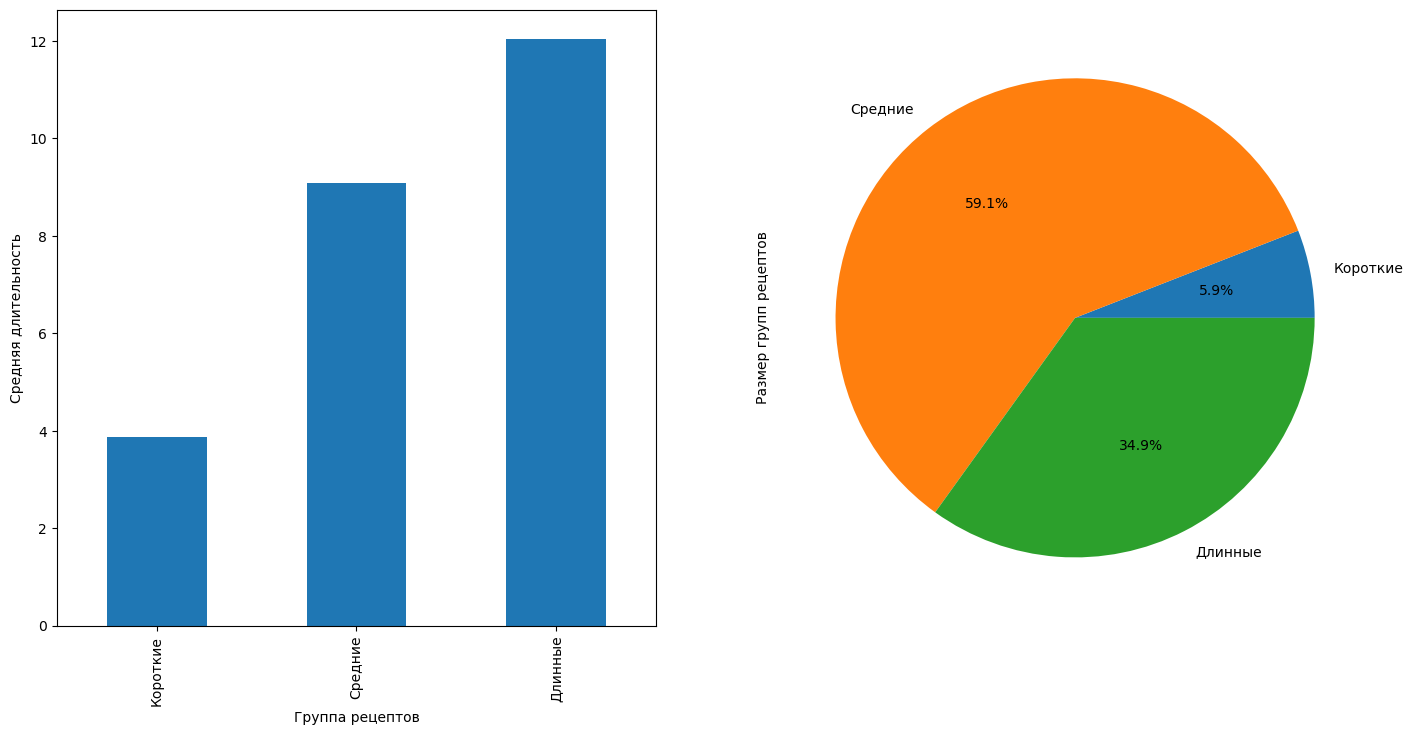

In [10]:
recipes["Группа"] = pd.cut(recipes["minutes"], 
                           bins=[0, 5, 50, float("inf")], 
                           labels=["Короткие", "Средние", "Длинные"])
grouped = recipes.groupby("Группа").agg({"n_steps": ["mean", 'count']})

fig, ax = plt.subplots(1, 2, figsize=(17, 8))

# столбчатая диаграмма
grouped[('n_steps', 'mean')].plot(kind="bar", ax=ax[0])
ax[0].set_ylabel("Средняя длительность")
ax[0].set_xlabel('Группа рецептов')

# круговая диаграмма
grouped[('n_steps', "count")].plot(kind="pie", ax=ax[1], autopct='%1.1f%%')
ax[1].set_ylabel("Размер групп рецептов")

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [11]:
reviews['date'] = pd.to_datetime(reviews['date'])
reviews = reviews[(reviews['date'].dt.year == 2008) | (reviews['date'].dt.year == 2009)]
reviews

,user_id,recipe_id,date,rating,review
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
1023302,308434,11252,2008-12-14,5,Oh Bergy! These wonderful little cakes are aw...
264646,151754,285773,2008-09-04,0,"This was a very moist cornbread, even two days..."
126930,379985,150499,2008-08-21,5,I really liked this recipe. It's perfect to ma...
...,...,...,...,...,...
532061,335737,36548,2008-04-22,5,If only there were more stars to give! Normall...
698638,1186693,394518,2009-12-09,0,I must have done something wrong! Mine were v...
344676,724631,314698,2008-10-14,5,"5 Stars, The Hunter said the mushrooms and sau..."
1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...


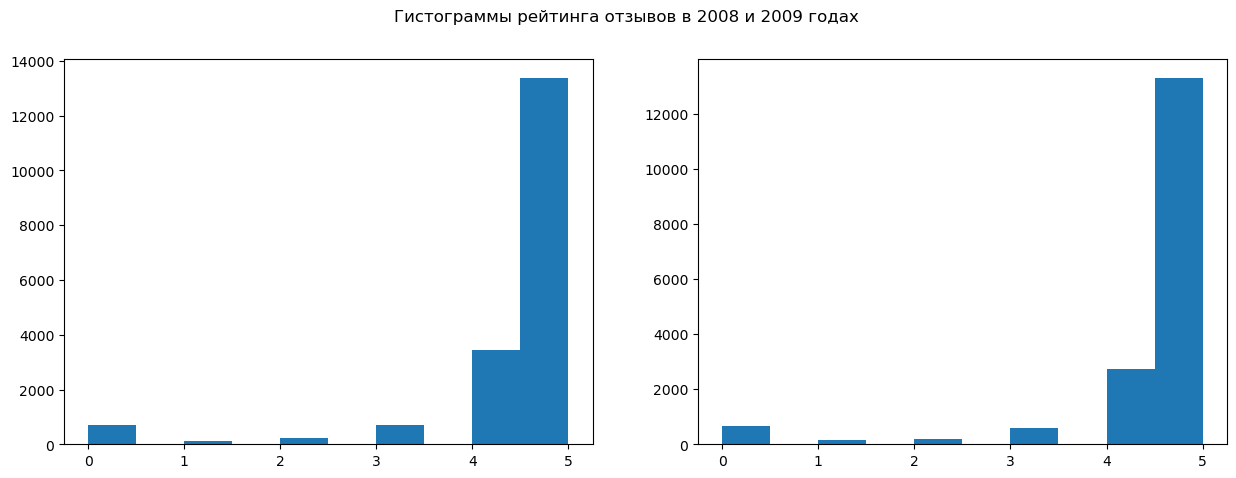

In [12]:
fig, (ax6_1, ax6_2) = plt.subplots(1, 2, figsize = (15, 5))
reviews[reviews['date'].dt.year == 2008]['rating'].plot.hist(ax = ax6_1)
reviews[reviews['date'].dt.year == 2009]['rating'].plot.hist(ax = ax6_2)
ax6_1.set_ylabel('')
ax6_2.set_ylabel('')
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах');

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

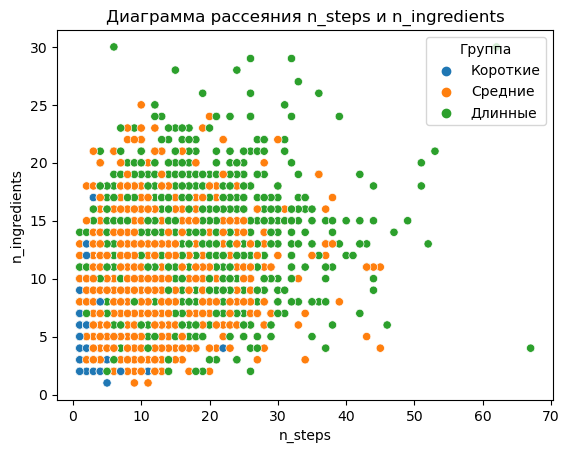

In [13]:
sns.scatterplot(data=recipes, x="n_steps", y="n_ingredients", hue = 'Группа')
plt.title("Диаграмма рассеяния n_steps и n_ingredients")

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

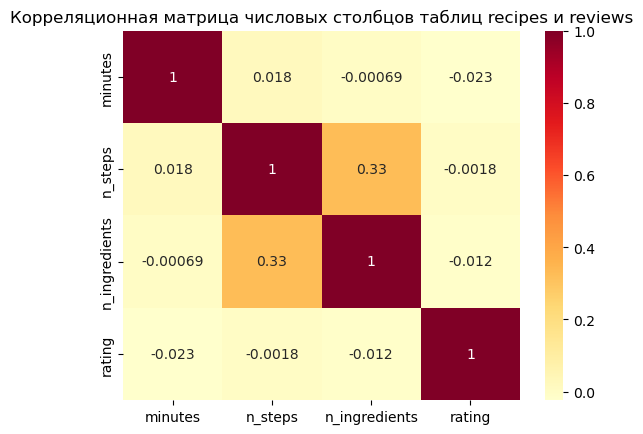

In [15]:
df8 = pd.merge(recipes, reviews, left_on = 'id', right_on = 'recipe_id')[['minutes', 'n_steps', 'n_ingredients', 'rating']]
corr = df8.corr()
sns.heatmap(corr, annot = True, cmap = "YlOrRd")
plt.title("Корреляционная матрица числовых столбцов таблиц recipes и reviews")